# Data Analysis: New Internet Customers in Fort McMurray
### Import CSV

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# Import May CSV
data_may = pd.read_csv('Fort McMurray Internet Customers 1705.csv')
may = data_may['subscriber_uid']
data_may.head()

,month_id,subscriber_uid,city,fsa,services_subscribed_name,internet_service_level,internet_rgu,account_mrr,internet_mrr
0,1705,6042033,FORT MCMURRAY,T9K,Video - Internet,Internet 150,1,79.9,36.80
1,1705,1514931,FORT MCMURRAY,T9H,Video - Internet,High-Speed(GF),1,164.0,35.05
2,1705,1520312,FORT MCMURRAY,T9K,Video - Internet - Phone,Internet 150,1,220.9,79.90
3,1705,1516231,FORT MCMURRAY,T9K,Video - Internet - Phone,Internet 60,1,250.0,95.00
4,1705,9336788,FORT MCMURRAY,T9H,Video - Internet,Internet 150,1,144.9,79.90


### 1) New Internet Customers - Customers in the current month with interet_rgu > 0 with conditions below:

a. Subscriber_uid is in the current month but not in the previous month OR

b. Subscriber_uid exists in the previous month but internet_rgu in the current month > previous month

In [11]:
# Selecting rows with multiple columns criteria
new_data_may = data_may[(data_may.internet_mrr > 0) & (data_may.internet_mrr.dropna())]
print "The processed May data has a size of {}, the raw May data has a size of {}".format(new_data_may.shape[0], data_may.shape[0])

The processed May data has a size of 12642, the raw May data has a size of 14672


In [13]:
# Import April CSV and filter out internet_mrr less than 0, also drop any missing data
data_april = pd.read_csv('Fort McMurray Internet Customers 1704.csv')
april = data_april['subscriber_uid']
new_data_april = data_april[(data_april.internet_mrr > 0) & (data_april.internet_mrr.dropna())]
print "The processed April data has a size of {}, the raw April data has a size of {}".format(new_data_april.shape[0], data_april.shape[0])

The processed April data has a size of 12754, the raw April data has a size of 14767


<IPython.core.display.Javascript object>


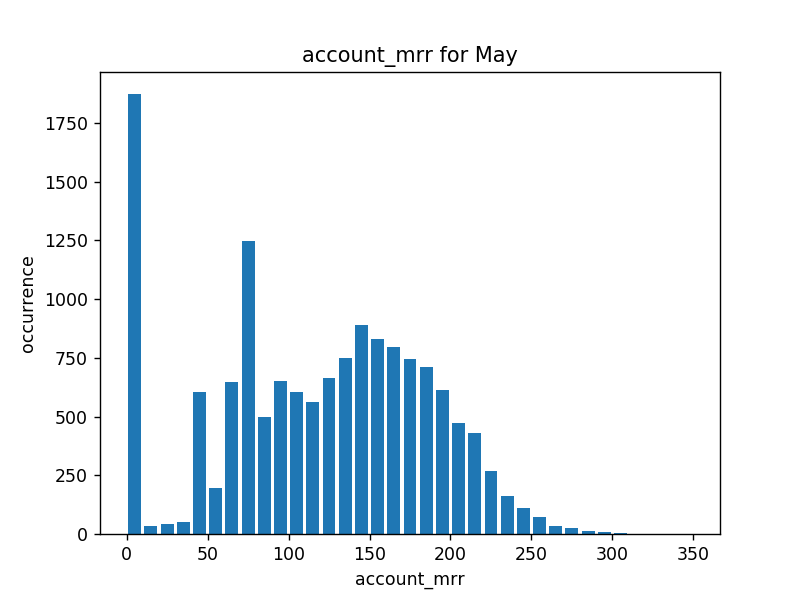

In [20]:
# plot 'account_mrr' in histogram 
x = data_may['account_mrr']
x = x.dropna()
y = np.arange(0,360,10)
plt.figure()
plt.hist(x, y, histtype='bar', rwidth=0.8)
plt.title('account_mrr for May')
plt.xlabel('account_mrr')
plt.ylabel('occurrence')


<IPython.core.display.Javascript object>


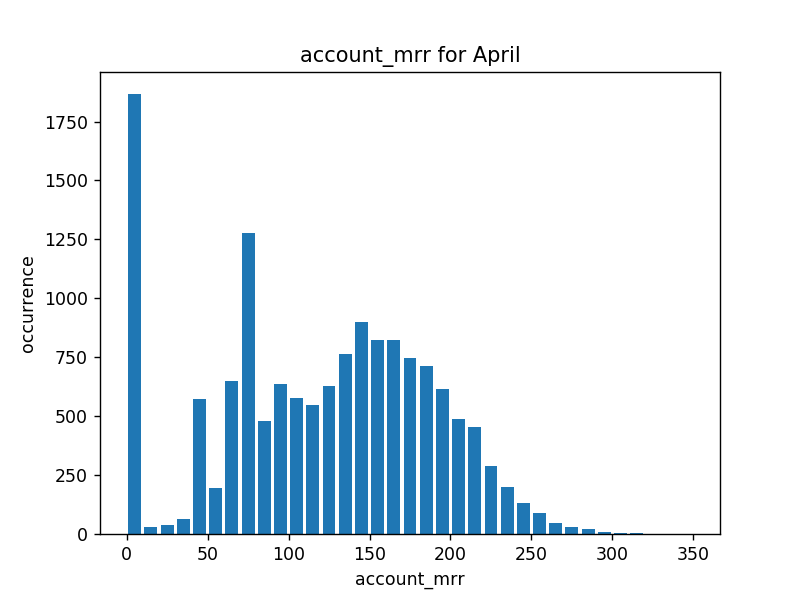

In [22]:
# plot 'account_mrr' in histogram 
x = data_april['account_mrr']
x = x.dropna()
y = np.arange(0,360,10)
plt.figure()
plt.hist(x, y, histtype='bar', rwidth=0.8)
plt.title('account_mrr for April')
plt.xlabel('account_mrr')
plt.ylabel('occurrence')

In [26]:
print "The maximum monthly recurring rate in April is ${}".format(max(x))

The maximum monthly recurring rate in April is $344.9


<IPython.core.display.Javascript object>


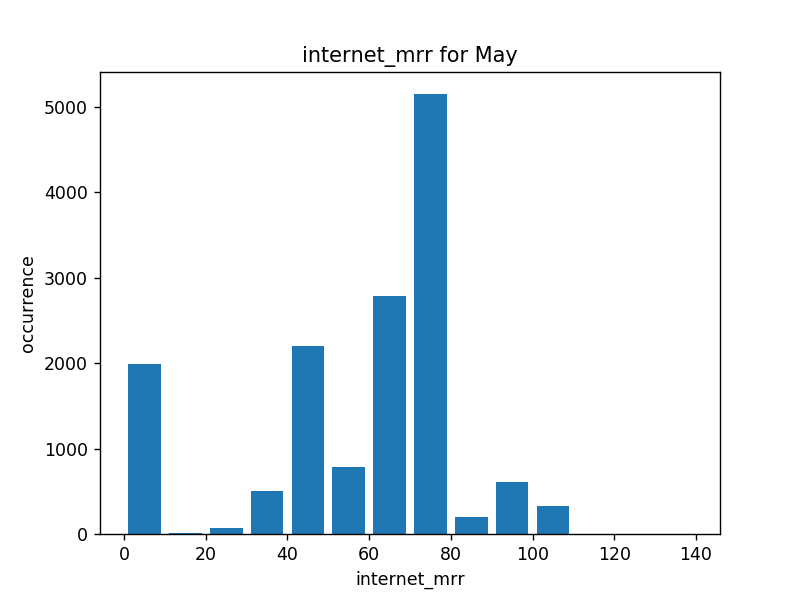

In [27]:
# plot 'internet_mrr' in histogram
y = np.arange(0,150,10)
z = data_may['internet_mrr']
z = z.dropna()
plt.figure()
plt.hist(z, y, histtype='bar', rwidth=0.8)
plt.title('internet_mrr for May')
plt.xlabel('internet_mrr')
plt.ylabel('occurrence')

<IPython.core.display.Javascript object>


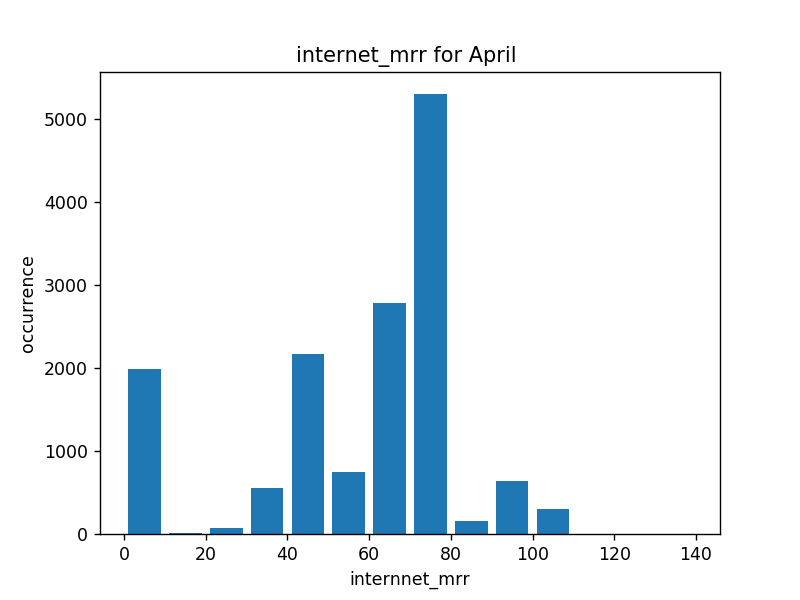

In [28]:
# plot 'internet_mrr' in histogram
y = np.arange(0,150,10)
z = data_april['internet_mrr']
z = z.dropna()
plt.figure()
plt.hist(z, y, histtype='bar', rwidth=0.8)
plt.title('internet_mrr for April ')
plt.xlabel('internnet_mrr')
plt.ylabel('occurrence')

In [30]:
# Select subscriber_uid for both May and April
new_may_subscriber_uid = new_data_may['subscriber_uid']
new_april_subscriber_uid = new_data_april['subscriber_uid']

In [32]:
# Make a list of existing customers ID who appears in both May and April
existing_customers_list = []
for i in new_may_subscriber_uid:
    for j in new_april_subscriber_uid:
        if i == j:
            existing_customers_list.append(i)

In [43]:
# Pick out the existing customers in May's DataFrame
existing_customers_may = new_data_may.loc[new_data_may.subscriber_uid.isin(existing_customers_list)]

### Display existing customers who appear in both current and previous month

In [38]:
# Make sure existing_customers_may matches the ID in existing_customers_list
print existing_customers_may.shape[0], len(existing_customers_list)
existing_customers_may.head()

12428 12428


,month_id,subscriber_uid,city,fsa,services_subscribed_name,internet_service_level,internet_rgu,account_mrr,internet_mrr
0,1705,6042033,FORT MCMURRAY,T9K,Video - Internet,Internet 150,1,79.9,36.80
1,1705,1514931,FORT MCMURRAY,T9H,Video - Internet,High-Speed(GF),1,164.0,35.05
2,1705,1520312,FORT MCMURRAY,T9K,Video - Internet - Phone,Internet 150,1,220.9,79.90
3,1705,1516231,FORT MCMURRAY,T9K,Video - Internet - Phone,Internet 60,1,250.0,95.00
4,1705,9336788,FORT MCMURRAY,T9H,Video - Internet,Internet 150,1,144.9,79.90


In [54]:
# Pick out the new customers
new_customers = len(new_may_subscriber_uid) - len(existing_customers_list)
print "The number of new customers is: {}".format(new_customers)

The number of new customers is: 214


In [42]:
# Select existing customers in April's Dataframe
existing_customers_april = new_data_april.loc[new_data_april.subscriber_uid.isin(existing_customers_list)]

In [53]:
# print existing_customers_april.shape[0], len(existing_customers_list)
print "The number of existing customers in both current and previous month is: {}".format(existing_customers_april.shape[0])
existing_customers_april.head()

The number of existing customers in both current and previous month is: 12428


,month_id,subscriber_uid,city,fsa,services_subscribed_name,internet_service_level,internet_rgu,account_mrr,internet_mrr
0,1704,1513604,FORT MCMURRAY,T9H,Video - Internet,Internet 15,1,142.0,66.0
1,1704,1513606,FORT MCMURRAY,T9K,Video - Internet,Internet 5,1,130.0,50.0
2,1704,1513591,FORT MCMURRAY,T9K,Video - Internet,Internet 5,1,80.0,55.0
3,1704,1513640,FORT MCMURRAY,T9H,Video - Internet,Internet 150,1,154.9,79.9
4,1704,1513642,FORT MCMURRAY,T9K,Video - Internet - Phone,Internet 30,1,143.0,70.0


In [48]:
# Compare existing customers in both May and April, make sure they are the same group
df_may = existing_customers_may.sort('subscriber_uid', axis=0, ascending=True)
df_may.head()

/Users/JiaHui/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,month_id,subscriber_uid,city,fsa,services_subscribed_name,internet_service_level,internet_rgu,account_mrr,internet_mrr
2547,1705,1512419,FORT MCMURRAY,T9H,Video - Internet - Phone,High-Speed(GF),1,182.95,62.00
4794,1705,1512421,FORT MCMURRAY,T9H,Video - Internet,High-Speed(GF),1,143.00,35.05
13875,1705,1512427,FORT MCMURRAY,T9H,Video - Internet,Internet 15,1,151.00,66.00
312,1705,1512429,FORT MCMURRAY,T9H,Video - Internet - Phone,High Speed 20(GF),1,209.00,72.00
396,1705,1512433,FORT MCMURRAY,T9H,Video - Internet - Phone,High Speed 20(GF),1,181.00,72.00


In [47]:
df_april = existing_customers_april.sort('subscriber_uid', axis=0, ascending=True)
df_april.head()

/Users/JiaHui/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,month_id,subscriber_uid,city,fsa,services_subscribed_name,internet_service_level,internet_rgu,account_mrr,internet_mrr
10197,1704,1512419,FORT MCMURRAY,T9H,Video - Internet - Phone,High-Speed(GF),1,182.95,62.00
3293,1704,1512421,FORT MCMURRAY,T9H,Video - Internet,High-Speed(GF),1,143.00,35.05
1364,1704,1512427,FORT MCMURRAY,T9H,Video - Internet,Internet 15,1,151.00,66.00
10184,1704,1512429,FORT MCMURRAY,T9H,Video - Internet - Phone,High Speed 20(GF),1,209.00,72.00
8596,1704,1512433,FORT MCMURRAY,T9H,Video - Internet - Phone,High Speed 20(GF),1,181.00,72.00


In [50]:
# They are not equal because of the index
existing_customers_april.equals(existing_customers_may)

False

In [55]:
new_df = df_may.merge(df_april, how='outer', on='subscriber_uid', suffixes=['_May', '_Apr'])
new_df.head()

,month_id_May,subscriber_uid,city_May,fsa_May,services_subscribed_name_May,internet_service_level_May,internet_rgu_May,account_mrr_May,internet_mrr_May,month_id_Apr,city_Apr,fsa_Apr,services_subscribed_name_Apr,internet_service_level_Apr,internet_rgu_Apr,account_mrr_Apr,internet_mrr_Apr
0,1705,1512419,FORT MCMURRAY,T9H,Video - Internet - Phone,High-Speed(GF),1,182.95,62.00,1704,FORT MCMURRAY,T9H,Video - Internet - Phone,High-Speed(GF),1,182.95,62.00
1,1705,1512421,FORT MCMURRAY,T9H,Video - Internet,High-Speed(GF),1,143.00,35.05,1704,FORT MCMURRAY,T9H,Video - Internet,High-Speed(GF),1,143.00,35.05
2,1705,1512427,FORT MCMURRAY,T9H,Video - Internet,Internet 15,1,151.00,66.00,1704,FORT MCMURRAY,T9H,Video - Internet,Internet 15,1,151.00,66.00
3,1705,1512429,FORT MCMURRAY,T9H,Video - Internet - Phone,High Speed 20(GF),1,209.00,72.00,1704,FORT MCMURRAY,T9H,Video - Internet - Phone,High Speed 20(GF),1,209.00,72.00
4,1705,1512433,FORT MCMURRAY,T9H,Video - Internet - Phone,High Speed 20(GF),1,181.00,72.00,1704,FORT MCMURRAY,T9H,Video - Internet - Phone,High Speed 20(GF),1,181.00,72.00


### The number of existing customers who has less internet_rgu in April than May is 0

In [57]:
# Select new customers
new_subscriber_uid = []
for index, row in new_df.iterrows():
    if row['internet_rgu_May'] > row['internet_rgu_Apr']:
        new_subscriber_uid.append(row['subscriber_uid'])

In [60]:
print "The number of existing customers who has less internet_rgu in April than May is: {}".format(len(new_subscriber_uid))

The number of existing customers who has less internet_rgu in April than May is: 0


### The total number of new customers is 214

In [63]:
print "The total number of new customers is: {}".format(len(new_subscriber_uid) + new_customers)

The total number of new customers is: 214


In [64]:
print new_data_april.shape
print new_data_may.shape

(12754, 9)
(12642, 9)


### Churn - customers disconnecting service measured by both count of disconnecting RGUs and churn rate defined below:
a) Subscriber_uid is in the previous month but not in the current month OR

b) Subscriber_uid is in both months but internet_rgu in previous month > current month

Churn Rate % = Disconnects / Average (internet_rgu previous month and internet_rgu current_month)


In [65]:
# Merge all May and April data
new_df = pd.merge(new_data_april, new_data_may, how='left', on='subscriber_uid', suffixes=['_4', '_5'])
new_df.head()

,month_id_4,subscriber_uid,city_4,fsa_4,services_subscribed_name_4,internet_service_level_4,internet_rgu_4,account_mrr_4,internet_mrr_4,month_id_5,city_5,fsa_5,services_subscribed_name_5,internet_service_level_5,internet_rgu_5,account_mrr_5,internet_mrr_5
0,1704,1513604,FORT MCMURRAY,T9H,Video - Internet,Internet 15,1,142.0,66.0,1705.0,FORT MCMURRAY,T9H,Video - Internet,Internet 15,1.0,142.0,66.0
1,1704,1513606,FORT MCMURRAY,T9K,Video - Internet,Internet 5,1,130.0,50.0,1705.0,FORT MCMURRAY,T9K,Video - Internet,Internet 5,1.0,130.0,50.0
2,1704,1513591,FORT MCMURRAY,T9K,Video - Internet,Internet 5,1,80.0,55.0,1705.0,FORT MCMURRAY,T9K,Video - Internet - Phone,Internet 5,1.0,90.0,55.0
3,1704,1513640,FORT MCMURRAY,T9H,Video - Internet,Internet 150,1,154.9,79.9,1705.0,FORT MCMURRAY,T9H,Video - Internet,Internet 150,1.0,154.9,79.9
4,1704,1513642,FORT MCMURRAY,T9K,Video - Internet - Phone,Internet 30,1,143.0,70.0,1705.0,FORT MCMURRAY,T9K,Video - Internet - Phone,Internet 30,1.0,143.0,70.0


In [67]:
print "The combined size of May and April is: {}".format(new_df.shape[0])

The combined size of May and April is: 12754


In [68]:
# Pick out the lost customers

import math
lost_uid = []
for i, r in new_df.iterrows():
    if math.isnan(r['month_id_5']):
        lost_uid.append(r['subscriber_uid'])

In [70]:
print "The number customers lost in May is: {}".format(len(lost_uid))

The number customers lost in May is: 326


In [71]:
new_df = pd.merge(new_data_april, new_data_may, how='inner', on='subscriber_uid', suffixes=['_4', '_5'])
new_df.head()

,month_id_4,subscriber_uid,city_4,fsa_4,services_subscribed_name_4,internet_service_level_4,internet_rgu_4,account_mrr_4,internet_mrr_4,month_id_5,city_5,fsa_5,services_subscribed_name_5,internet_service_level_5,internet_rgu_5,account_mrr_5,internet_mrr_5
0,1704,1513604,FORT MCMURRAY,T9H,Video - Internet,Internet 15,1,142.0,66.0,1705,FORT MCMURRAY,T9H,Video - Internet,Internet 15,1,142.0,66.0
1,1704,1513606,FORT MCMURRAY,T9K,Video - Internet,Internet 5,1,130.0,50.0,1705,FORT MCMURRAY,T9K,Video - Internet,Internet 5,1,130.0,50.0
2,1704,1513591,FORT MCMURRAY,T9K,Video - Internet,Internet 5,1,80.0,55.0,1705,FORT MCMURRAY,T9K,Video - Internet - Phone,Internet 5,1,90.0,55.0
3,1704,1513640,FORT MCMURRAY,T9H,Video - Internet,Internet 150,1,154.9,79.9,1705,FORT MCMURRAY,T9H,Video - Internet,Internet 150,1,154.9,79.9
4,1704,1513642,FORT MCMURRAY,T9K,Video - Internet - Phone,Internet 30,1,143.0,70.0,1705,FORT MCMURRAY,T9K,Video - Internet - Phone,Internet 30,1,143.0,70.0


In [72]:
lost_uid_2 = []
for i, r in new_df.iterrows():
    if r['internet_rgu_4'] > r['internet_rgu_5']:
        lost_uid_2.append(r['subscriber_uid'])

In [73]:
len(lost_uid_2)

0

In [74]:
count = 0
for i, r in new_df.iterrows():
    if math.isnan(r['internet_rgu_4']) or math.isnan(r['internet_rgu_5']):
        count += 1

In [75]:
count

0

In [77]:
avg = np.mean([new_data_april.shape[0], new_data_may.shape[0]])

In [78]:
churn = float(len(lost_uid)) / float(avg)

In [83]:
print "The Churn Rate is: {}%".format(churn * 100)

The Churn Rate is: 2.56733343834%


In [35]:
# Just another check to make sure preprocessed data for may and april don't have NaNs
count = 0
for i, r in new_data_april.iterrows():
    if math.isnan(r['internet_rgu']) or math.isnan(r['internet_mrr']) or math.isnan(r['account_mrr']):
        count += 1
        
count

0

In [36]:
data_lost_uid = new_data_april.loc[new_data_april['subscriber_uid'].isin(lost_uid)]
data_lost_uid.head()

,month_id,subscriber_uid,city,fsa,services_subscribed_name,internet_service_level,internet_rgu,account_mrr,internet_mrr
58,1704,1526500,FORT MCMURRAY,T9K,Internet,Internet 30,1,75.0,75.0
180,1704,1517775,FORT MCMURRAY,T9H,Video - Internet - Phone,High Speed 10(GF),1,157.0,65.0
213,1704,1514592,FORT MCMURRAY,T9H,Video - Internet - Phone,Broadband 50(GGF),1,222.0,93.0
382,1704,4772327,FORT MCMURRAY,T9H,Internet,Internet 150,1,79.9,79.9
534,1704,1515715,FORT MCMURRAY,T9H,Video - Internet - Phone,Internet 15,1,185.0,61.0


In [37]:
data_lost_uid.shape

(326, 9)

In [38]:
# Lost uid by internet_service_level
data_lost_uid['internet_service_level'].value_counts()

Internet 150           116
Internet 30             81
Internet 15             48
High-Speed(GF)          24
Internet 60             18
Broadband 50(GGF)        9
Broadband 100(GGF)       8
Internet 5               6
High Speed 20(GF)        6
High Speed 10(GF)        3
Extreme(GF)              2
Internet 150 Plus        2
Warp(GF)                 1
Access                   1
Broadband 100+(GGF)      1
Name: internet_service_level, dtype: int64

In [39]:
data_lost_uid['fsa'].value_counts()

T9H    165
T9K    157
T9J      4
Name: fsa, dtype: int64

In [40]:
data_lost_uid['services_subscribed_name'].value_counts()

Video - Internet            143
Internet                     94
Video - Internet - Phone     82
Internet - Phone              7
Name: services_subscribed_name, dtype: int64

In [41]:
# Uid in april by internet_service_level
new_data_april['internet_service_level'].value_counts()

Internet 150           5194
Internet 30            2398
Internet 15            1427
High-Speed(GF)         1422
Internet 60             536
Broadband 50(GGF)       423
High Speed 10(GF)       317
Internet 5              314
High Speed 20(GF)       242
Extreme(GF)             224
Broadband 100(GGF)      127
Internet 150 Plus        93
Broadband 100+(GGF)      10
High-Speed Lite(GF)      10
Access                    9
Internet 120              6
Warp(GF)                  2
Name: internet_service_level, dtype: int64

In [42]:
new_data_april['fsa'].value_counts()

T9K    7176
T9H    5330
T9J     247
Z0Z       1
Name: fsa, dtype: int64

In [43]:
new_data_april['services_subscribed_name'].value_counts()

Video - Internet            5813
Video - Internet - Phone    4033
Internet                    2545
Internet - Phone             363
Name: services_subscribed_name, dtype: int64

In [44]:
# Uid in may by internet_service_level
new_data_may['internet_service_level'].value_counts()

Internet 150           5385
Internet 30            2303
Internet 15            1360
High-Speed(GF)         1351
Internet 60             537
Broadband 50(GGF)       401
High Speed 10(GF)       310
Internet 5              305
High Speed 20(GF)       233
Extreme(GF)             215
Broadband 100(GGF)      113
Internet 150 Plus        96
Broadband 100+(GGF)       9
High-Speed Lite(GF)       9
Access                    8
Internet 120              6
Warp(GF)                  1
Name: internet_service_level, dtype: int64

In [45]:
new_data_may['fsa'].value_counts()

T9K    7122
T9H    5273
T9J     246
Z0Z       1
Name: fsa, dtype: int64

In [46]:
new_data_may['services_subscribed_name'].value_counts()

Video - Internet            5729
Video - Internet - Phone    4015
Internet                    2539
Internet - Phone             359
Name: services_subscribed_name, dtype: int64

In [47]:
total_isl_df = pd.concat([new_data_may['internet_service_level'].value_counts(), new_data_april['internet_service_level'].value_counts(), data_lost_uid['internet_service_level'].value_counts()], axis=1)

In [48]:
total_isl_df.columns = ['internet_service_level_5', 'internet_service_level_4', 'internet_service_level_lost']

In [49]:
total_isl_df

,internet_service_level_5,internet_service_level_4,internet_service_level_lost
Access,8,9,1.0
Broadband 100(GGF),113,127,8.0
Broadband 100+(GGF),9,10,1.0
Broadband 50(GGF),401,423,9.0
Extreme(GF),215,224,2.0
High Speed 10(GF),310,317,3.0
High Speed 20(GF),233,242,6.0
High-Speed Lite(GF),9,10,NaN
High-Speed(GF),1351,1422,24.0
Internet 120,6,6,NaN


In [50]:
total_isl_df = total_isl_df.dropna()
total_isl_df

,internet_service_level_5,internet_service_level_4,internet_service_level_lost
Access,8,9,1.0
Broadband 100(GGF),113,127,8.0
Broadband 100+(GGF),9,10,1.0
Broadband 50(GGF),401,423,9.0
Extreme(GF),215,224,2.0
High Speed 10(GF),310,317,3.0
High Speed 20(GF),233,242,6.0
High-Speed(GF),1351,1422,24.0
Internet 15,1360,1427,48.0
Internet 150,5385,5194,116.0


In [51]:
churn_isl = []
for i, r in total_isl_df.iterrows():
    avg = np.mean([r['internet_service_level_5'], r['internet_service_level_4']])
    churn_isl.append(100 * float(r['internet_service_level_lost']) / avg)

In [52]:
churn_isl

[11.764705882352942,
 6.666666666666667,
 10.526315789473685,
 2.1844660194174756,
 0.91116173120728927,
 0.9569377990430622,
 2.5263157894736841,
 1.7309772809231878,
 3.4445640473627557,
 2.1930239153039039,
 2.1164021164021163,
 3.4460753031269942,
 1.938610662358643,
 3.3550792171481825,
 66.666666666666671]

In [53]:
index_isl = []
for i, r in total_isl_df.iterrows():
    index_isl.append(i)

In [54]:
index_isl

['Access',
 'Broadband 100(GGF)',
 'Broadband 100+(GGF)',
 'Broadband 50(GGF)',
 'Extreme(GF)',
 'High Speed 10(GF)',
 'High Speed 20(GF)',
 'High-Speed(GF)',
 'Internet 15',
 'Internet 150',
 'Internet 150 Plus',
 'Internet 30',
 'Internet 5',
 'Internet 60',
 'Warp(GF)']

In [55]:
churn_isl_df = pd.DataFrame(churn_isl, columns=['churn%'], index=index_isl)

In [56]:
churn_isl_df

,churn%
Access,11.764706
Broadband 100(GGF),6.666667
Broadband 100+(GGF),10.526316
Broadband 50(GGF),2.184466
Extreme(GF),0.911162
High Speed 10(GF),0.956938
High Speed 20(GF),2.526316
High-Speed(GF),1.730977
Internet 15,3.444564
Internet 150,2.193024


<IPython.core.display.Javascript object>


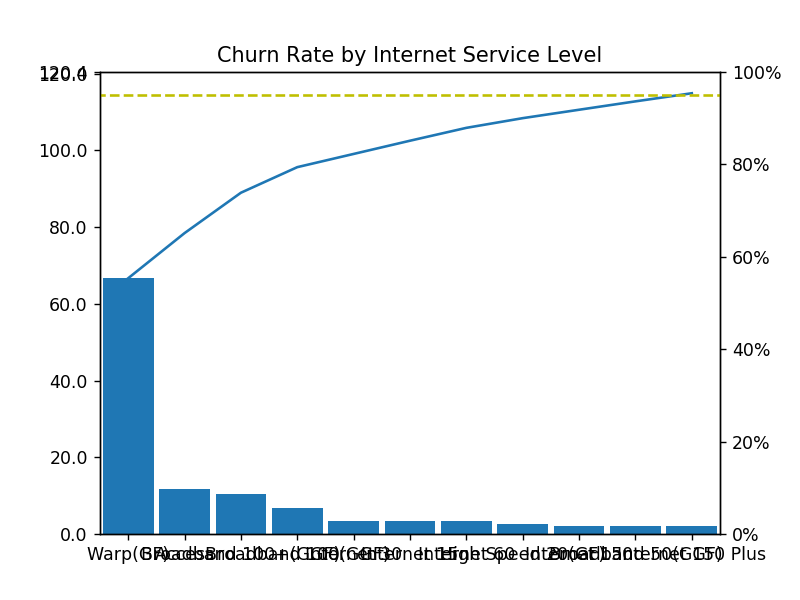

In [57]:
from paretochart import pareto
plt.figure()
pareto(churn_isl, index_isl, limit=0.95, limit_kw={'color':'y'})
plt.title('Churn Rate by Internet Service Level')

In [58]:
total_fsa_df = pd.concat([new_data_may['fsa'].value_counts(), new_data_april['fsa'].value_counts(), data_lost_uid['fsa'].value_counts()], axis=1)

In [59]:
total_fsa_df.columns = ['fsa_5', 'fsa_4', 'fsa_lost']
total_fsa_df = total_fsa_df.dropna()
total_fsa_df

,fsa_5,fsa_4,fsa_lost
T9H,5273,5330,165.0
T9J,246,247,4.0
T9K,7122,7176,157.0


In [63]:
churn_fsa = []
for i, r in total_fsa_df.iterrows():
    avg = np.mean([r['fsa_5'], r['fsa_4']])
    churn_fsa.append(100 * float(r['fsa_lost']) / avg)

<IPython.core.display.Javascript object>


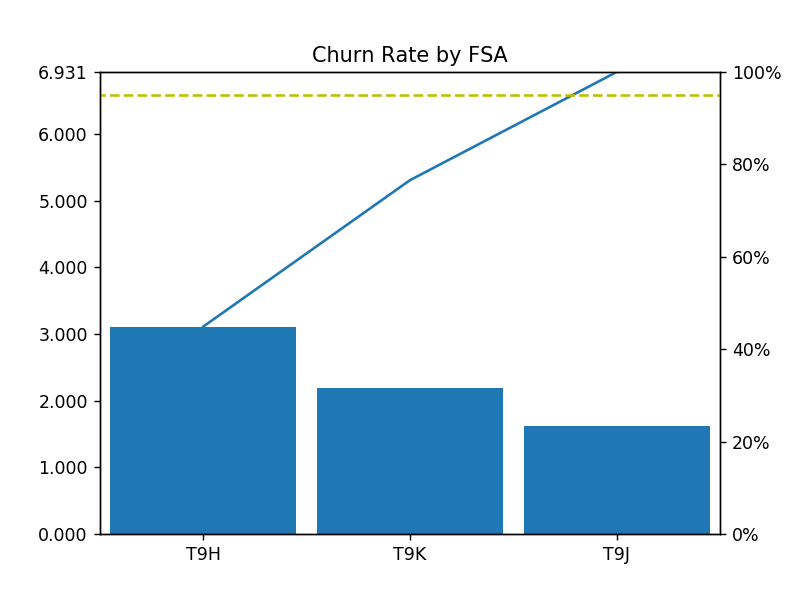

In [66]:
plt.figure()
pareto(churn_fsa, index_fsa, limit=0.95, limit_kw={'color':'y'})
plt.title('Churn Rate by FSA')

In [65]:
index_fsa = []
for i, r in total_fsa_df.iterrows():
    index_fsa.append(i)

In [67]:
index_fsa

['T9H', 'T9J', 'T9K']

In [68]:
churn_fsa

[3.1123266999905685, 1.6227180527383367, 2.1961113442439504]

In [69]:
total_ssn_df = pd.concat([new_data_may['services_subscribed_name'].value_counts(), new_data_april['services_subscribed_name'].value_counts(), data_lost_uid['services_subscribed_name'].value_counts()], axis=1)

In [70]:
total_ssn_df.columns = ['services_subscribed_name_5', 'services_subscribed_name_4', 'services_subscribed_name_lost']

In [71]:
total_ssn_df

,services_subscribed_name_5,services_subscribed_name_4,services_subscribed_name_lost
Internet,2539,2545,94
Internet - Phone,359,363,7
Video - Internet,5729,5813,143
Video - Internet - Phone,4015,4033,82


In [72]:
index_ssn = []
for i, r in total_ssn_df.iterrows():
    index_ssn.append(i)
    
index_ssn

['Internet',
 'Internet - Phone',
 'Video - Internet',
 'Video - Internet - Phone']

In [73]:
churn_ssn = []
for i, r in total_ssn_df.iterrows():
    avg = np.mean([r['services_subscribed_name_5'], r['services_subscribed_name_4']])
    churn_ssn.append(100 * float(r['services_subscribed_name_lost']) / avg)

In [74]:
churn_ssn

[3.6978756884343036,
 1.9390581717451523,
 2.4779067752555881,
 2.0377733598409544]

<IPython.core.display.Javascript object>


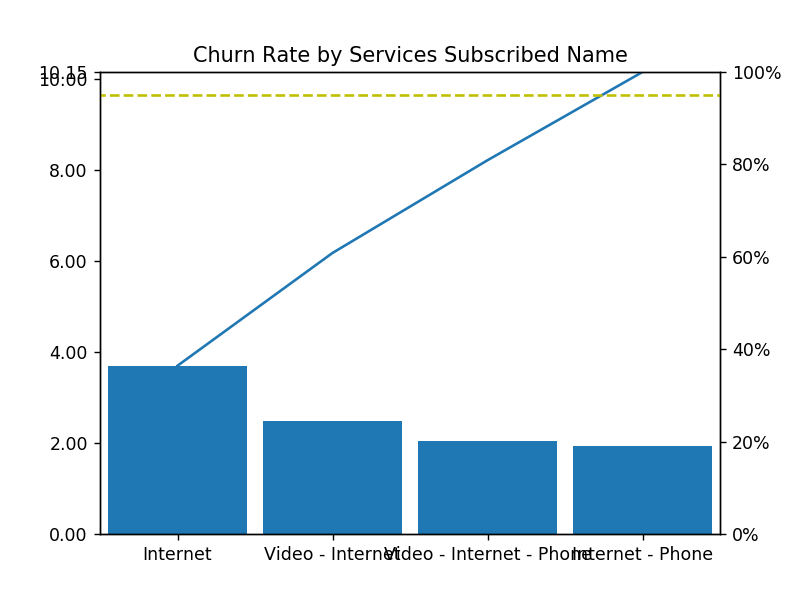

In [75]:
plt.figure()
pareto(churn_ssn, index_ssn, limit=0.95, limit_kw={'color':'y'})
plt.title('Churn Rate by Services Subscribed Name')

In [76]:
new_data_may.head()

,month_id,subscriber_uid,city,fsa,services_subscribed_name,internet_service_level,internet_rgu,account_mrr,internet_mrr
0,1705,6042033,FORT MCMURRAY,T9K,Video - Internet,Internet 150,1,79.9,36.80
1,1705,1514931,FORT MCMURRAY,T9H,Video - Internet,High-Speed(GF),1,164.0,35.05
2,1705,1520312,FORT MCMURRAY,T9K,Video - Internet - Phone,Internet 150,1,220.9,79.90
3,1705,1516231,FORT MCMURRAY,T9K,Video - Internet - Phone,Internet 60,1,250.0,95.00
4,1705,9336788,FORT MCMURRAY,T9H,Video - Internet,Internet 150,1,144.9,79.90


In [77]:
print new_data_may.shape[0]

12642


In [78]:
new_df = pd.merge(new_data_april, new_data_may, how='right', on='subscriber_uid', suffixes=['_4', '_5'])
new_df.head()

,month_id_4,subscriber_uid,city_4,fsa_4,services_subscribed_name_4,internet_service_level_4,internet_rgu_4,account_mrr_4,internet_mrr_4,month_id_5,city_5,fsa_5,services_subscribed_name_5,internet_service_level_5,internet_rgu_5,account_mrr_5,internet_mrr_5
0,1704.0,1513604,FORT MCMURRAY,T9H,Video - Internet,Internet 15,1.0,142.0,66.0,1705,FORT MCMURRAY,T9H,Video - Internet,Internet 15,1,142.0,66.0
1,1704.0,1513606,FORT MCMURRAY,T9K,Video - Internet,Internet 5,1.0,130.0,50.0,1705,FORT MCMURRAY,T9K,Video - Internet,Internet 5,1,130.0,50.0
2,1704.0,1513591,FORT MCMURRAY,T9K,Video - Internet,Internet 5,1.0,80.0,55.0,1705,FORT MCMURRAY,T9K,Video - Internet - Phone,Internet 5,1,90.0,55.0
3,1704.0,1513640,FORT MCMURRAY,T9H,Video - Internet,Internet 150,1.0,154.9,79.9,1705,FORT MCMURRAY,T9H,Video - Internet,Internet 150,1,154.9,79.9
4,1704.0,1513642,FORT MCMURRAY,T9K,Video - Internet - Phone,Internet 30,1.0,143.0,70.0,1705,FORT MCMURRAY,T9K,Video - Internet - Phone,Internet 30,1,143.0,70.0


In [79]:
new_uid = []
for i, r in new_df.iterrows():
    if math.isnan(r['month_id_4']):
        new_uid.append(r['subscriber_uid'])

In [80]:
len(new_uid)

214

In [81]:
new_uid_df = new_data_may.loc[new_data_may['subscriber_uid'].isin(new_uid)]

In [82]:
new_uid_df.head() # DataFrame of new custoemrs in May

,month_id,subscriber_uid,city,fsa,services_subscribed_name,internet_service_level,internet_rgu,account_mrr,internet_mrr
62,1705,10361531,FORT MCMURRAY,T9K,Internet,Internet 150,1,49.9,49.9
278,1705,10325954,FORT MCMURRAY,T9K,Internet,Internet 150,1,49.9,49.9
309,1705,10314774,FORT MCMURRAY,T9K,Video - Internet,Internet 150,1,87.9,49.9
611,1705,10337651,FORT MCMURRAY,T9H,Internet,Internet 150,1,49.9,49.9
681,1705,10341937,FORT MCMURRAY,T9H,Video - Internet - Phone,Internet 150,1,107.9,44.9


In [83]:
new_uid_df.loc[new_uid_df['subscriber_uid'] == 	10337651]

,month_id,subscriber_uid,city,fsa,services_subscribed_name,internet_service_level,internet_rgu,account_mrr,internet_mrr
611,1705,10337651,FORT MCMURRAY,T9H,Internet,Internet 150,1,49.9,49.9


In [84]:
new_data_may.loc[new_data_may['subscriber_uid'] == 	10337651]

,month_id,subscriber_uid,city,fsa,services_subscribed_name,internet_service_level,internet_rgu,account_mrr,internet_mrr
611,1705,10337651,FORT MCMURRAY,T9H,Internet,Internet 150,1,49.9,49.9


In [85]:
new_data_april.loc[new_data_april['subscriber_uid'] == 	10337651]

,month_id,subscriber_uid,city,fsa,services_subscribed_name,internet_service_level,internet_rgu,account_mrr,internet_mrr


In [86]:
new_df = pd.merge(new_data_april, new_data_may, how='left', on='subscriber_uid', suffixes=['_4', '_5'])
new_df.head()

,month_id_4,subscriber_uid,city_4,fsa_4,services_subscribed_name_4,internet_service_level_4,internet_rgu_4,account_mrr_4,internet_mrr_4,month_id_5,city_5,fsa_5,services_subscribed_name_5,internet_service_level_5,internet_rgu_5,account_mrr_5,internet_mrr_5
0,1704,1513604,FORT MCMURRAY,T9H,Video - Internet,Internet 15,1,142.0,66.0,1705.0,FORT MCMURRAY,T9H,Video - Internet,Internet 15,1.0,142.0,66.0
1,1704,1513606,FORT MCMURRAY,T9K,Video - Internet,Internet 5,1,130.0,50.0,1705.0,FORT MCMURRAY,T9K,Video - Internet,Internet 5,1.0,130.0,50.0
2,1704,1513591,FORT MCMURRAY,T9K,Video - Internet,Internet 5,1,80.0,55.0,1705.0,FORT MCMURRAY,T9K,Video - Internet - Phone,Internet 5,1.0,90.0,55.0
3,1704,1513640,FORT MCMURRAY,T9H,Video - Internet,Internet 150,1,154.9,79.9,1705.0,FORT MCMURRAY,T9H,Video - Internet,Internet 150,1.0,154.9,79.9
4,1704,1513642,FORT MCMURRAY,T9K,Video - Internet - Phone,Internet 30,1,143.0,70.0,1705.0,FORT MCMURRAY,T9K,Video - Internet - Phone,Internet 30,1.0,143.0,70.0


In [87]:
new_df.shape[0]

12754

In [88]:
lost_uid = []
for i, r in new_df.iterrows():
    if math.isnan(r['month_id_5']):
        lost_uid.append(r['subscriber_uid'])

In [89]:
len(lost_uid)

326

In [90]:
lost_uid_df = new_data_april.loc[new_data_april['subscriber_uid'].isin(lost_uid)]

In [91]:
lost_uid_df.shape[0]

326

In [92]:
lost_uid_df.head()

,month_id,subscriber_uid,city,fsa,services_subscribed_name,internet_service_level,internet_rgu,account_mrr,internet_mrr
58,1704,1526500,FORT MCMURRAY,T9K,Internet,Internet 30,1,75.0,75.0
180,1704,1517775,FORT MCMURRAY,T9H,Video - Internet - Phone,High Speed 10(GF),1,157.0,65.0
213,1704,1514592,FORT MCMURRAY,T9H,Video - Internet - Phone,Broadband 50(GGF),1,222.0,93.0
382,1704,4772327,FORT MCMURRAY,T9H,Internet,Internet 150,1,79.9,79.9
534,1704,1515715,FORT MCMURRAY,T9H,Video - Internet - Phone,Internet 15,1,185.0,61.0


In [93]:
new_data_may.loc[new_data_may['subscriber_uid'] == 10299082]

,month_id,subscriber_uid,city,fsa,services_subscribed_name,internet_service_level,internet_rgu,account_mrr,internet_mrr


In [94]:
new_data_april.loc[new_data_april['subscriber_uid'] == 10299082]

,month_id,subscriber_uid,city,fsa,services_subscribed_name,internet_service_level,internet_rgu,account_mrr,internet_mrr
14752,1704,10299082,FORT MCMURRAY,T9K,Video - Internet,Internet 150,1,89.9,60.0


In [95]:
# existing customers, common in both May and April
new_df = pd.merge(new_data_april, new_data_may, how='inner', on='subscriber_uid', suffixes=['_4', '_5'])
new_df.head()

,month_id_4,subscriber_uid,city_4,fsa_4,services_subscribed_name_4,internet_service_level_4,internet_rgu_4,account_mrr_4,internet_mrr_4,month_id_5,city_5,fsa_5,services_subscribed_name_5,internet_service_level_5,internet_rgu_5,account_mrr_5,internet_mrr_5
0,1704,1513604,FORT MCMURRAY,T9H,Video - Internet,Internet 15,1,142.0,66.0,1705,FORT MCMURRAY,T9H,Video - Internet,Internet 15,1,142.0,66.0
1,1704,1513606,FORT MCMURRAY,T9K,Video - Internet,Internet 5,1,130.0,50.0,1705,FORT MCMURRAY,T9K,Video - Internet,Internet 5,1,130.0,50.0
2,1704,1513591,FORT MCMURRAY,T9K,Video - Internet,Internet 5,1,80.0,55.0,1705,FORT MCMURRAY,T9K,Video - Internet - Phone,Internet 5,1,90.0,55.0
3,1704,1513640,FORT MCMURRAY,T9H,Video - Internet,Internet 150,1,154.9,79.9,1705,FORT MCMURRAY,T9H,Video - Internet,Internet 150,1,154.9,79.9
4,1704,1513642,FORT MCMURRAY,T9K,Video - Internet - Phone,Internet 30,1,143.0,70.0,1705,FORT MCMURRAY,T9K,Video - Internet - Phone,Internet 30,1,143.0,70.0


In [96]:
new_df.shape[0]

12428

In [97]:
print new_df['services_subscribed_name_4'].value_counts()
print new_df['services_subscribed_name_5'].value_counts()

Video - Internet            5670
Video - Internet - Phone    3951
Internet                    2451
Internet - Phone             356
Name: services_subscribed_name_4, dtype: int64
Video - Internet            5656
Video - Internet - Phone    3995
Internet                    2423
Internet - Phone             354
Name: services_subscribed_name_5, dtype: int64


In [98]:
print new_df['internet_service_level_4'].value_counts()
print new_df['internet_service_level_5'].value_counts()

Internet 150           5078
Internet 30            2317
High-Speed(GF)         1398
Internet 15            1379
Internet 60             518
Broadband 50(GGF)       414
High Speed 10(GF)       314
Internet 5              308
High Speed 20(GF)       236
Extreme(GF)             222
Broadband 100(GGF)      119
Internet 150 Plus        91
High-Speed Lite(GF)      10
Broadband 100+(GGF)       9
Access                    8
Internet 120              6
Warp(GF)                  1
Name: internet_service_level_4, dtype: int64
Internet 150           5216
Internet 30            2283
Internet 15            1353
High-Speed(GF)         1351
Internet 60             522
Broadband 50(GGF)       401
High Speed 10(GF)       310
Internet 5              303
High Speed 20(GF)       233
Extreme(GF)             215
Broadband 100(GGF)      113
Internet 150 Plus        95
Broadband 100+(GGF)       9
High-Speed Lite(GF)       9
Access                    8
Internet 120              6
Warp(GF)                  1
Nam

In [99]:
changed_service_name = []
for i, r in new_df.iterrows():
    if r['services_subscribed_name_4'] != r['services_subscribed_name_4']:
        changed_service_name.append(r['subscriber_uid'])

In [100]:
len(changed_service_name)

0

In [101]:
changed_service_level = []
for i, r in new_df.iterrows():
    if r['internet_service_level_4'] != r['internet_service_level_5']:
        changed_service_level.append(r['subscriber_uid'])

In [102]:
len(changed_service_level)

231

In [103]:
df_isl = pd.DataFrame(new_df['internet_service_level_5'].value_counts())
df_isl['internet_service_level_5']

Internet 150           5216
Internet 30            2283
Internet 15            1353
High-Speed(GF)         1351
Internet 60             522
Broadband 50(GGF)       401
High Speed 10(GF)       310
Internet 5              303
High Speed 20(GF)       233
Extreme(GF)             215
Broadband 100(GGF)      113
Internet 150 Plus        95
Broadband 100+(GGF)       9
High-Speed Lite(GF)       9
Access                    8
Internet 120              6
Warp(GF)                  1
Name: internet_service_level_5, dtype: int64

In [104]:
df_isl_4 = pd.DataFrame(new_df['internet_service_level_4'].value_counts())
df_isl_4['internet_service_level_4']

Internet 150           5078
Internet 30            2317
High-Speed(GF)         1398
Internet 15            1379
Internet 60             518
Broadband 50(GGF)       414
High Speed 10(GF)       314
Internet 5              308
High Speed 20(GF)       236
Extreme(GF)             222
Broadband 100(GGF)      119
Internet 150 Plus        91
High-Speed Lite(GF)      10
Broadband 100+(GGF)       9
Access                    8
Internet 120              6
Warp(GF)                  1
Name: internet_service_level_4, dtype: int64

In [105]:
y = df_isl_4['internet_service_level_4'].tolist()

In [115]:
y

[5078, 2317, 1398, 1379, 518, 414, 314, 308, 236, 222, 119, 91, 10, 9, 8, 6, 1]

<IPython.core.display.Javascript object>


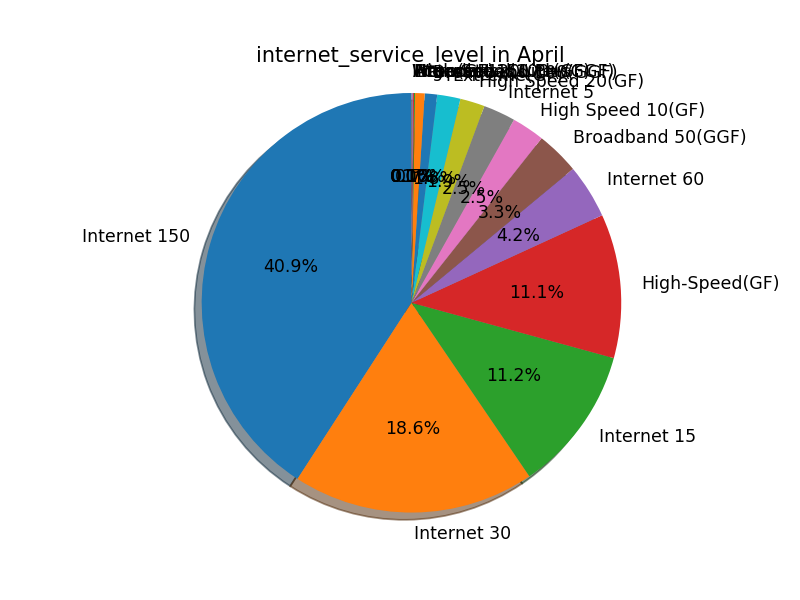

In [112]:
fig2, ax2 = plt.subplots()
ax2.pie(y, labels=index_isl, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.axis('equal')
plt.title("internet_service_level in April")

In [107]:
index_isl = []
for i, r in df_isl.iterrows():
    index_isl.append(i)

In [108]:
index_isl

['Internet 150',
 'Internet 30',
 'Internet 15',
 'High-Speed(GF)',
 'Internet 60',
 'Broadband 50(GGF)',
 'High Speed 10(GF)',
 'Internet 5',
 'High Speed 20(GF)',
 'Extreme(GF)',
 'Broadband 100(GGF)',
 'Internet 150 Plus',
 'Broadband 100+(GGF)',
 'High-Speed Lite(GF)',
 'Access',
 'Internet 120',
 'Warp(GF)']

In [110]:
x = df_isl['internet_service_level_5'].tolist()

<IPython.core.display.Javascript object>


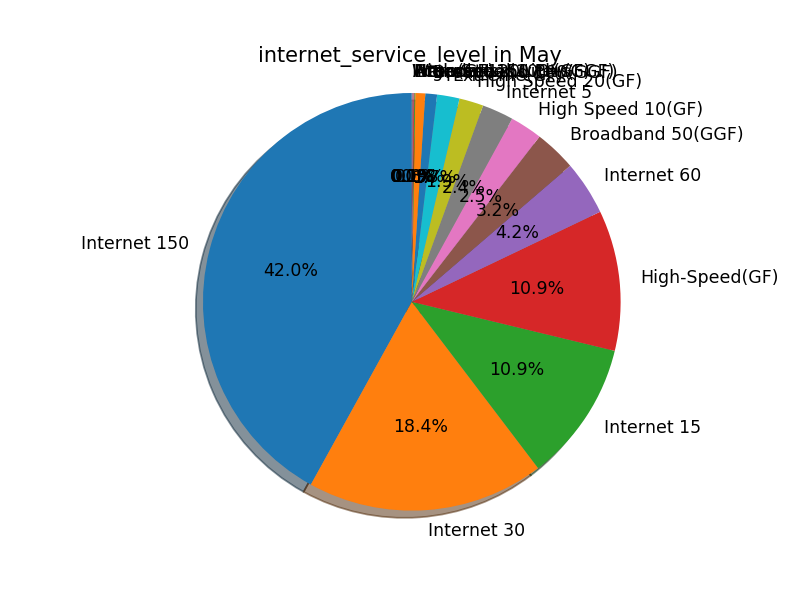

In [111]:
fig1, ax1 = plt.subplots()
ax1.pie(x, labels=index_isl, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title("internet_service_level in May")